## ECN407E
### TIME SERIES OF ECONOMETRICS



### Ezgi Özgen 090180344

In [94]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import arch
from arch.unitroot import ADF
from arch.unitroot import DFGLS
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [25]:
data = pd.read_excel("IMPGS.xls")

In [26]:
data

,Date,ImportGoodAServices,GDP,R_GDP_Income
0,1947-01-01,7.519,2034.450,2008.749
1,1947-04-01,8.203,2029.024,2006.266
2,1947-07-01,7.663,2024.834,2008.558
3,1947-10-01,8.347,2056.508,2027.823
4,1948-01-01,9.624,2087.442,2082.178
...,...,...,...,...
298,2021-07-01,3442.476,19672.594,19784.132
299,2021-10-01,3647.745,20006.181,20108.233
300,2022-01-01,3927.908,19924.088,20147.177
301,2022-04-01,4074.409,19895.271,20107.480


In [27]:
data = data.set_index(["Date"])

In [28]:
data

,ImportGoodAServices,GDP,R_GDP_Income
Date,,,
1947-01-01,7.519,2034.450,2008.749
1947-04-01,8.203,2029.024,2006.266
1947-07-01,7.663,2024.834,2008.558
1947-10-01,8.347,2056.508,2027.823
1948-01-01,9.624,2087.442,2082.178
...,...,...,...
2021-07-01,3442.476,19672.594,19784.132
2021-10-01,3647.745,20006.181,20108.233
2022-01-01,3927.908,19924.088,20147.177


## PLOT THE DATA

<AxesSubplot:xlabel='Date'>

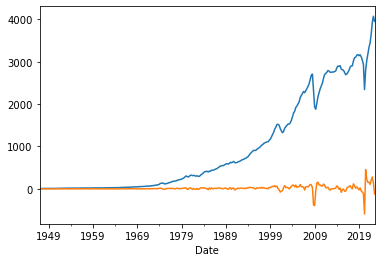

In [29]:
data_value=data.iloc[:,0]
dif_data_value=data_value.diff()
data_value.plot()
dif_data_value.plot()

<AxesSubplot:xlabel='Date'>

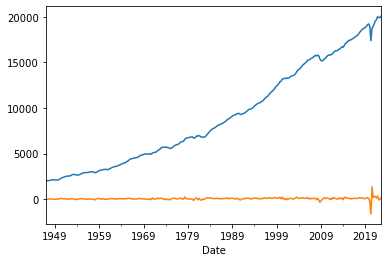

In [30]:
data_value=data.iloc[:,1]
dif_data_value=data_value.diff()
data_value.plot()
dif_data_value.plot()

<AxesSubplot:xlabel='Date'>

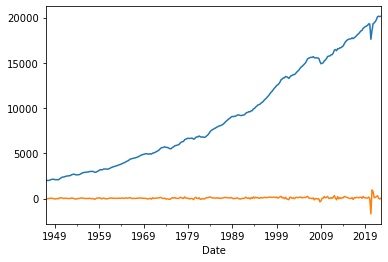

In [31]:
data_value=data.iloc[:,2]
dif_data_value=data_value.diff()
data_value.plot()
dif_data_value.plot()

## Augmented Dickey-Fuller TEST

In [93]:
def DickeyFuller(data):
    adf_RGDP = ADF(data, trend='ct', max_lags=20) 
    print(adf_RGDP.summary().as_text())
    reg_res = adf_RGDP.regression
    residuals=reg_res.resid
    print(reg_res.summary().as_text())
    plot_acf(residuals,lags=60)

    dif_RGDP=data.diff()
    dif_RGDP=dif_RGDP.dropna()
    dif_adf_RGDP = ADF(dif_RGDP, trend='ct', max_lags=10) 
    print(dif_adf_RGDP.summary().as_text())
    reg_res = dif_adf_RGDP.regression
    residuals=reg_res.resid
    print(reg_res.summary().as_text())
    plot_acf(residuals,lags=60)

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.286
P-value                         0.891
Lags                                2
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.824
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           0.000878
Time:                        23:11:28   Log-Likelihood:                -1904.9
No. Observations:                 300   AIC:                             3820.
Df Residuals:                     295   BIC:            

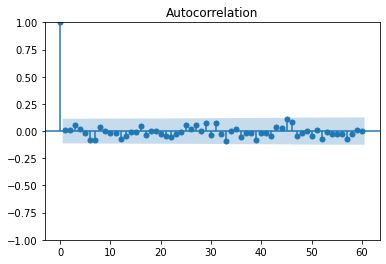

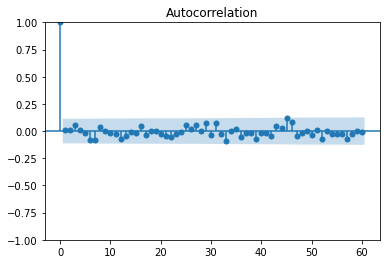

In [47]:
DickeyFuller(data["R_GDP_Income"])

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.198
P-value                         0.992
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     6.184
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.07e-10
Time:                        23:11:37   Log-Likelihood:                -1601.8
No. Observations:                 290   AIC:                             3234.
Df Residuals:                     275   BIC:            

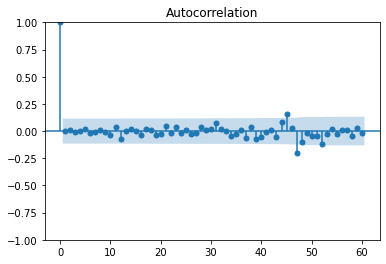

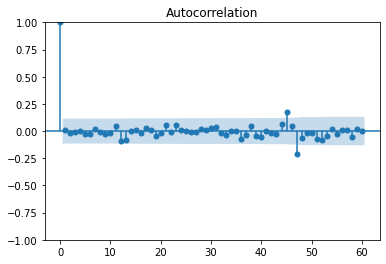

In [48]:
DickeyFuller(data["ImportGoodAServices"])

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.432
P-value                         0.851
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     6.343
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           0.000351
Time:                        23:11:41   Log-Likelihood:                -1912.3
No. Observations:                 301   AIC:                             3833.
Df Residuals:                     297   BIC:            

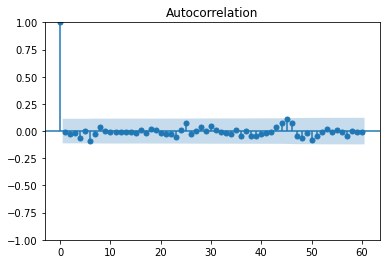

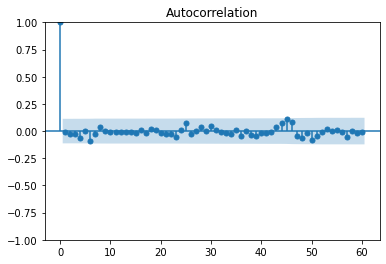

In [49]:
DickeyFuller(data['GDP'])

## KPSS TEST

In [55]:
def Kpss(data):
    kpss_data = KPSS(data, trend='ct') 
    print(kpss_data.summary().as_text())
    dif_data=data.diff()
    dif_data=dif_data.dropna()
    dif_kpss_data=KPSS(dif_data, trend='ct') 
    print(dif_kpss_data.summary().as_text())


In [56]:
Kpss(data["R_GDP_Income"])

    KPSS Stationarity Test Results   
Test Statistic                  0.676
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.035
P-value                         0.801
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [57]:
Kpss(data["GDP"])

    KPSS Stationarity Test Results   
Test Statistic                  0.679
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.036
P-value                         0.788
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
Kpss(data["ImportGoodAServices"])

    KPSS Stationarity Test Results   
Test Statistic                  0.704
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.028
P-value                         0.900
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [59]:
def Phillips(data):
    PhillipsPerron_data = PhillipsPerron (data, trend='ct') 
    print(PhillipsPerron_data.summary().as_text())
    dif_data=data.diff()
    dif_data=dif_data.dropna()
    dif_PhillipsPerron_data= PhillipsPerron (dif_data, trend='ct') 
    print(dif_PhillipsPerron_data.summary().as_text())

## Phillips - Perron TEST

In [97]:
Phillips(data["R_GDP_Income"])

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.333
P-value                         0.879
Lags                               16
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -18.433
P-value                         0.000
Lags                               16
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [61]:
Phillips(data["GDP"])

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.368
P-value                         0.870
Lags                               16
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -21.771
P-value                         0.000
Lags                               16
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [62]:
Phillips(data["ImportGoodAServices"])

     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.149
P-value                         0.995
Lags                               16
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -12.569
P-value                         0.000
Lags                               16
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## JOHANSEN TEST

In [92]:
train_vecm=data.iloc[0:280]
test_vecm=data.iloc[-5:]
vecmvalues=train_vecm.values 
Test_Johansen=coint_johansen(vecmvalues,0,2)
trace_test=pd.DataFrame(Test_Johansen.lr1)
trace_test.columns=["trace test stat"]
cvt=pd.DataFrame(Test_Johansen.cvt)
cvt.columns=["0.1","0.05","0.01"]
Trace_test=pd.concat([trace_test,cvt],axis=1)

meigen_test=pd.DataFrame(Test_Johansen.lr2)
meigen_test.columns=["meigen test stat"]
cvm=pd.DataFrame(Test_Johansen.cvm)
cvm.columns=["0.1","0.05","0.01"]
Meigen_test=pd.concat([meigen_test,cvm],axis=1)

In [76]:
train_vecm.shape

(280, 3)

In [77]:
test_vecm

,ImportGoodAServices,GDP,R_GDP_Income
Date,,,
2021-07-01,3442.476,19672.594,19784.132
2021-10-01,3647.745,20006.181,20108.233
2022-01-01,3927.908,19924.088,20147.177
2022-04-01,4074.409,19895.271,20107.480
2022-07-01,3955.795,20054.663,20148.828


In [78]:
Trace_test

,trace test stat,0.1,0.05,0.01
0,35.910230,27.0669,29.7961,35.4628
1,9.873294,13.4294,15.4943,19.9349
2,0.033910,2.7055,3.8415,6.6349


In [79]:
Meigen_test

,meigen test stat,0.1,0.05,0.01
0,26.036936,18.8928,21.1314,25.8650
1,9.839384,12.2971,14.2639,18.5200
2,0.033910,2.7055,3.8415,6.6349


## VECM MODEL 

C:\Users\EzgiOzgen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


lower bounds of confidence intervals:
[[ 2771.503 17783.084 17816.922]
 [ 2717.608 17781.2   17794.055]
 [ 2668.844 17777.21  17768.922]
 [ 2640.257 17783.181 17754.238]
 [ 2629.916 17797.819 17750.204]]

point forecasts:
[[ 2830.6 17891.1 17942.3]
 [ 2844.  17960.6 18008.6]
 [ 2849.6 18024.9 18070.1]
 [ 2856.9 18090.3 18131.6]
 [ 2869.6 18158.2 18196.5]]

upper bounds of confidence intervals:
[[ 2889.737 17999.073 18067.698]
 [ 2970.31  18140.082 18223.23 ]
 [ 3030.313 18272.621 18371.338]
 [ 3073.593 18397.506 18508.997]
 [ 3109.301 18518.507 18642.774]]


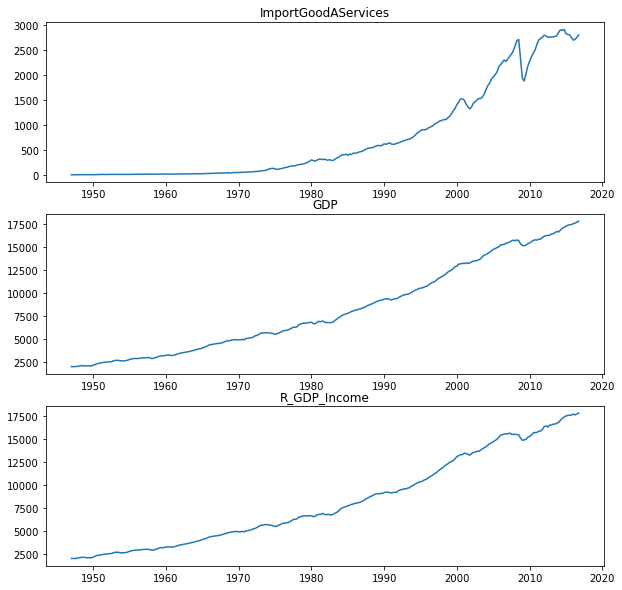

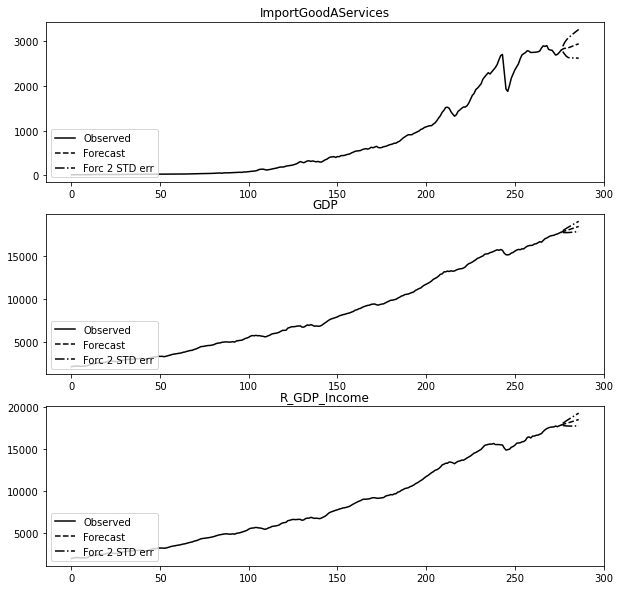

In [85]:
from statsmodels.tsa.api import VECM
model = VECM(train_vecm, k_ar_diff=2, coint_rank=1, deterministic='ci') 
vecm_res = model.fit()
vecm_res.summary()

vecm_res.plot_data(with_presample=True)
vecmalphabeta=vecm_res.gamma.round(4) 

## Forecast
predicted_values=pd.DataFrame(vecm_res.predict(steps=5))
predicted_values.columns=['ImportGoodAServices', 'R_GDP_Income', 'GDP']


forecast, lower, upper = vecm_res.predict(5, 0.05)
print("lower bounds of confidence intervals:")
print(lower.round(3))
print("\npoint forecasts:")
print(forecast.round(1))
print("\nupper bounds of confidence intervals:")
print(upper.round(3))

vecm_res.plot_forecast(steps=10) 



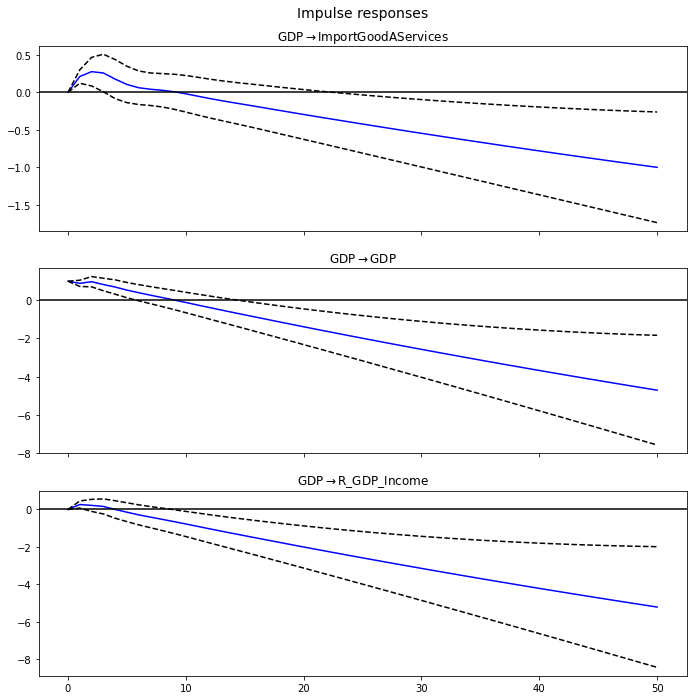

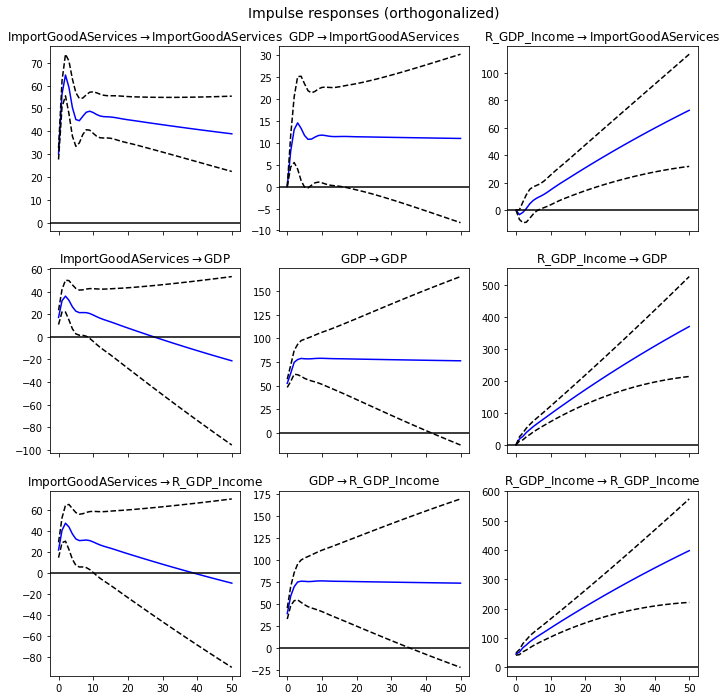

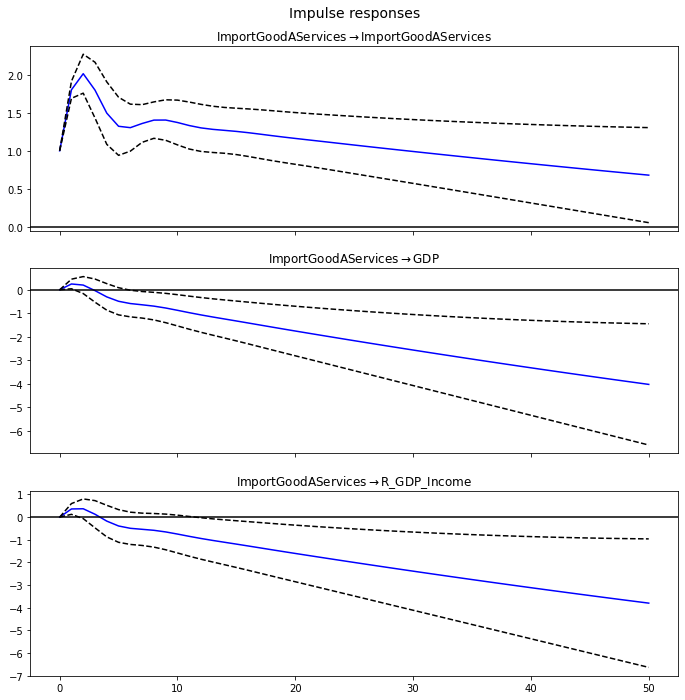

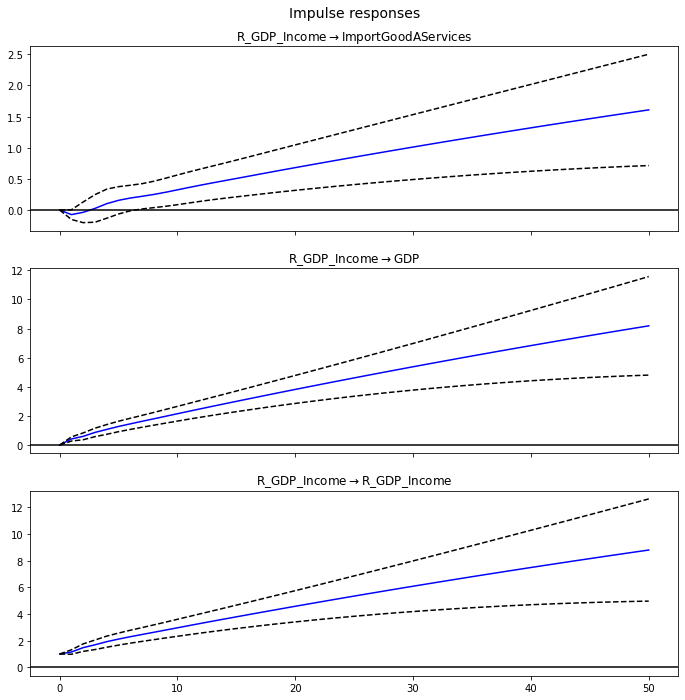

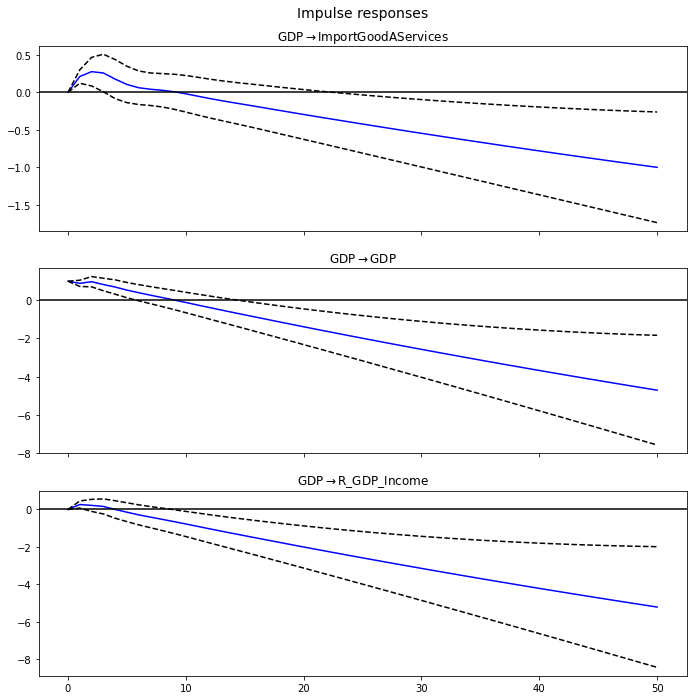

In [95]:
irf = vecm_res.irf(50)
irf.plot(orth=True)

irf.plot(impulse='ImportGoodAServices') 
irf.plot(impulse='R_GDP_Income') 
irf.plot(impulse='GDP') 


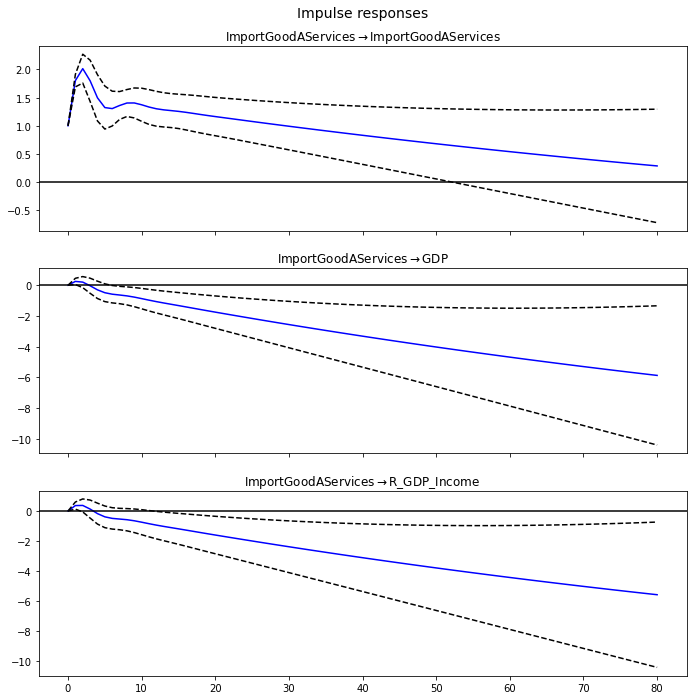

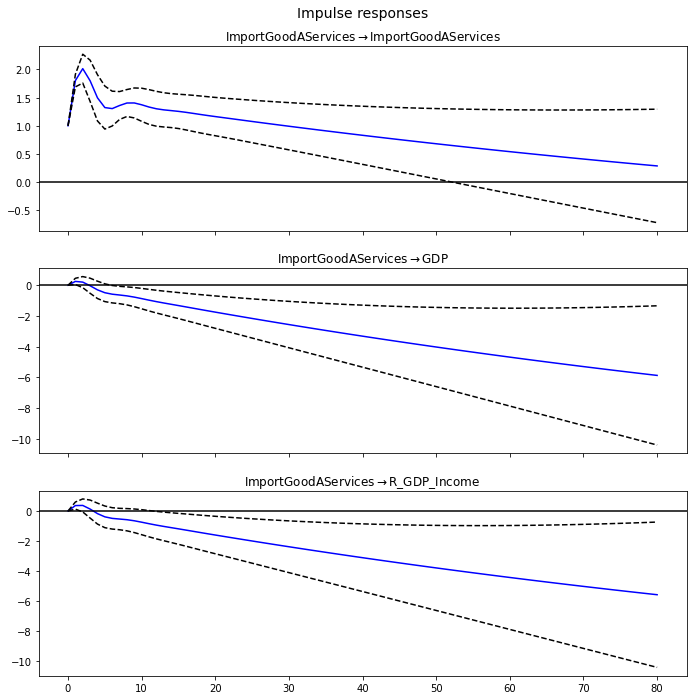

In [96]:
irf = vecm_res.irf(80)
irf.plot(impulse='ImportGoodAServices') 

## RESULT

In [88]:
## Calculation of the metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  
    mae = np.mean(np.abs(forecast - actual))    
    rmse = np.mean((forecast - actual)**2)**.5 
    return({'mape':mape, 'mae': mae, 
             'rmse':rmse})
test_values=test_vecm.reset_index(drop=True) 
metrics_for_ImportGoodAServices=forecast_accuracy(predicted_values.ImportGoodAServices, test_values.ImportGoodAServices)
metrics_for_R_GDP=forecast_accuracy(predicted_values.R_GDP_Income, test_values.R_GDP_Income)
metrics_for_GDP=forecast_accuracy(predicted_values.GDP, test_values.GDP)

In [89]:
metrics_for_ImportGoodAServices

{'mape': 0.24920249177168788,
 'mae': 959.5284413301197,
 'rmse': 984.4087552748346}

In [90]:
metrics_for_R_GDP

{'mape': 0.10138814761353639,
 'mae': 2034.1416363459932,
 'rmse': 2036.2407725367884}

In [91]:
metrics_for_GDP

{'mape': 0.0924307043003064,
 'mae': 1840.7216266381197,
 'rmse': 1843.067434926893}